In [1]:
from Model.config import config
from Model.codes import Codes
from Model.file import File
from Model.functions import Function
from Model.indicator import Indicator
from Model.stock import Stock
from Model.strategy import Strategy
from functools import partial
from itertools import product
import datetime
import Model.exploration as e
import itertools
import quandl
import dill as pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
quandl.ApiConfig.api_key = config.API_KEY # mandatory to make api calls on quandl
print(config.TEST)

ImportError: cannot import name 'config'

In [20]:
def load_stocks():
    stocks = []
    codes = Codes()
    for index, _ in codes.data[codes.data.INCLUDE_FOR_ANALYSIS].iterrows():
        stocks.append(File(index, class_type = 'Stock').load())
    return stocks

def get_stock(code):
    return File(code, class_type='Stock').load()

def get_strategy(strategy_name):
    return File(strategy_name, class_type='Strategy').load()

def get_indicator(indicator_name):
    return File(indicator_name, class_type='Indicator').load()

def get_function(function_name):
    return File(function_name, class_type='Function').load()
    
def plot_stock(code, indicators = [], strategy_name = None, figsize = (10,5), labelbottom = False, labelleft = False):
    stock = get_stock(code)
    strategy = get_strategy(strategy_name)
    fig, axis = plt.subplots(nrows = 1, ncols=1, sharex = False, sharey = False, figsize=figsize)
    trades = strategy.to_dataframe()
    for ax in np.array(axis).reshape(-1):
        ax.plot(stock.data.index, stock.data.CLOSE)
        k = 0
        for indicator in indicators:
            ax.plot(stock.data.index, stock.data[indicator.name], color = colors[k])
            k = k+1
        ax.set_title(stock.name, fontsize = 8, y = 0.98)
        df = trades[trades.STOCK_NAME == stock.name]
        for index, row in df.iterrows():
            if not strategy is None:
                opening_date = row.OPENING_DATE
                closing_date = row.CLOSING_DATE
                ax.axvline(row.OPENING_DATE, color='grey', linestyle ='dashed', linewidth=0.5)
                if str(closing_date) == 'NaT':
                    closing_date = stock.last_date
                else:
                    ax.axvline(row.CLOSING_DATE, color='grey', linestyle ='dashed', linewidth=0.5)                    
                sub_stock = stock.data.loc[opening_date:closing_date]
                if row.PERFORMANCE >= 1:
                    color = 'green'
                else:
                    color = 'red'
                ax.plot(sub_stock.index, sub_stock.CLOSE, color=color)
        ax.tick_params(axis='both', which='both', bottom=True, labelbottom=True, left=True, labelleft=True)
    plt.show()
    
    
def plot_all_stocks(strategy_name = None, figsize = (20,130), labelbottom = False, labelleft = False):
    j = 0
    strategy = get_strategy(strategy_name)
    nrows = int(len(stocks) / 4) + 1
    ncols = min(len(stocks), 4)
    fig, axis = plt.subplots(nrows = nrows, ncols=ncols, sharex = False, sharey = False, figsize=figsize)
    trades = strategy.to_dataframe()
    for ax in np.array(axis).reshape(-1):
        if j < len(stocks):
            stock = stocks[j]
            ax.plot(stock.data.index, stock.data.CLOSE)
            k = 0
            for indicator in indicators:
                ax.plot(stock.data.index, stock.data[indicator.name], color = colors[k])
                k = k+1
            ax.set_title(stock.name, fontsize = 8, y = 0.98)
            df = trades[trades.STOCK_NAME == stock.name]
            for index, row in df.iterrows():
                if not strategy is None:
                    opening_date = row.OPENING_DATE
                    closing_date = row.CLOSING_DATE
                    ax.axvline(row.OPENING_DATE, color='grey', linestyle ='dashed', linewidth=0.5)
                    if str(closing_date) == 'NaT':
                        closing_date = stock.last_date
                    else:
                        ax.axvline(row.CLOSING_DATE, color='grey', linestyle ='dashed', linewidth=0.5)                    
                    sub_stock = stock.data.loc[opening_date:closing_date]
                    if row.PERFORMANCE >= 1:
                        color = 'green'
                    else:
                        color = 'red'
                    ax.plot(sub_stock.index, sub_stock.CLOSE, color=color)
            ax.tick_params(axis='both', which='both', bottom=False, labelbottom=labelbottom, left=False, labelleft=labelleft)
            j = j + 1
    plt.show()
    
def bids_of_the_day(strategy):
    stocks = load_stocks()
    for stock in stocks:
        stock.refresh()
    strategy.refresh(stocks)
    print([t for t in strategy.trades if t.status == 'awaiting buy'])
    print([t for t in strategy.trades if t.status == 'awaiting sell'])

In [25]:
bids_of_the_day(get_strategy('SMA80_SMA150'))

AALB successfully updated!
AB successfully updated!
ABI successfully updated!
ABN successfully updated!
AC successfully updated!
ACA successfully updated!
AD successfully updated!
AF successfully updated!
AGFB successfully updated!
AGN successfully updated!
AGS successfully updated!
AI successfully updated!
AIR successfully updated!
AKE successfully updated!
AKZA successfully updated!
ALADO successfully updated!
ALAUP successfully updated!
ALBPS successfully updated!
ALCLS successfully updated!
ALCYB successfully updated!
ALD successfully updated!
ALHYG successfully updated!
ALNXT successfully updated!
ALO successfully updated!
ALT successfully updated!
ALTR successfully updated!
ALVMG successfully updated!
AMG successfully updated!
AMUN successfully updated!
APAM successfully updated!
ARCAD successfully updated!
ASM successfully updated!
ASML successfully updated!
ASRNL successfully updated!
ATC successfully updated!
ATCB successfully updated!
ATO successfully updated!
BAMNB successfu

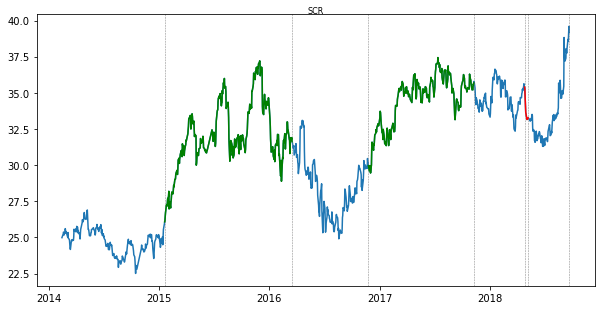

In [31]:
plot_stock('SCR', strategy_name='SMA80_SMA150')

In [30]:
get_stock('SCR').full_name

'Scor Se (SCR)'